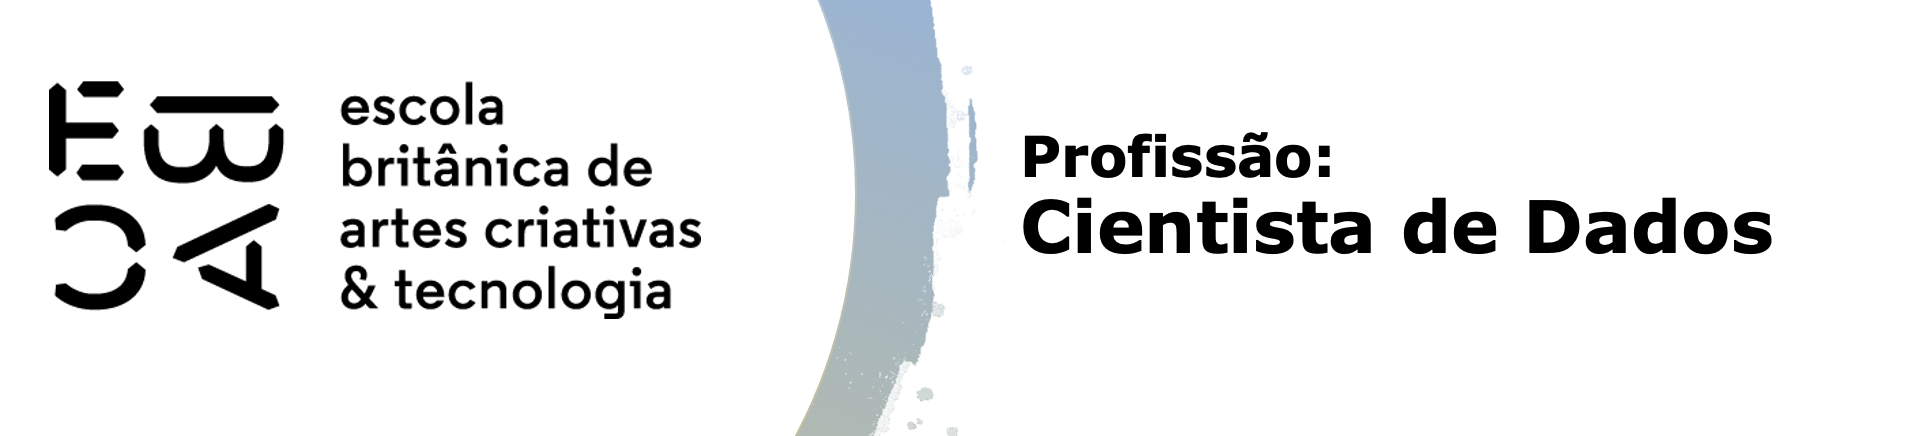

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV

##### Carregando dados

In [6]:
# Treino e teste (X)
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

# Treino e test (target)
y_train = pd.read_csv('y_train.txt', header=None)
y_train.columns = ['activity']

y_test = pd.read_csv('y_test.txt', header=None)
y_test.columns = ['activity']


# subject de treino e test
subject_train = pd.read_csv('./input/subject_train.txt', header=None)
subject_train.columns = ['subject_id']

subject_test = pd.read_csv('./input/subject_test.txt', header=None)
subject_test.columns = ['subject_id']

In [7]:
# Dados de treino (X)
X_train = pd.concat([subject_train, X_train], axis=1)
X_train = X_train.set_index([X_train.index, 'subject_id'])
print(X_train.shape)
X_train.head(2)

(7352, 561)


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,subject_id,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317


In [8]:
# Dados de teste (X)
X_test = pd.concat([subject_test, X_test], axis=1)
X_test = X_test.set_index([X_test.index, 'subject_id'])
print(X_test.shape)
X_test.head(2)

(2947, 561)


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,subject_id,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.01750,-0.434375,0.920593,-0.698091,0.281343,-0.083898


In [9]:
# Dados treino (y)
print(y_train.shape)
y_train.head(2)

(7352, 1)


,activity
0,5
1,5


In [10]:
# Dados teste (y)
print(y_test.shape)
y_test.head(2)

(2947, 1)


,activity
0,5
1,5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

**As 3 variáveis são:** 'tGravityAcc-min()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)'

In [13]:
# Determinando os dados
# Treino
X_train_selected = X_train[['tGravityAcc-min()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']]
X_train_selected.head(2)

,,tGravityAcc-min()-X,fBodyAcc-mean()-X,"angle(Y,gravityMean)"
,subject_id,,,
0,1,0.977436,-0.994783,0.179941
1,1,0.984520,-0.997451,0.180289


In [14]:
# Test
X_test_selected = X_test[['tGravityAcc-min()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']]
X_test_selected.head(2)

,,tGravityAcc-min()-X,fBodyAcc-mean()-X,"angle(Y,gravityMean)"
,subject_id,,,
0,2,0.944461,-0.918510,0.276801
1,2,0.944461,-0.960903,0.281343


In [15]:
%%time
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=2360873)
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

CPU times: total: 15.6 ms
Wall time: 23 ms


In [16]:
print(len(ccp_alphas))
ccp_alphas

107


array([0.00000000e+00, 6.59906426e-06, 6.80087051e-06, 6.96674540e-06,
       8.76841795e-06, 9.14215380e-06, 9.14215380e-06, 9.35119695e-06,
       9.41658994e-06, 1.00688213e-05, 1.01582623e-05, 1.15563664e-05,
       1.26701149e-05, 2.57564883e-05, 3.42562367e-05, 3.51180840e-05,
       3.56459420e-05, 3.88621172e-05, 4.44836813e-05, 4.46039075e-05,
       4.75633208e-05, 4.76060936e-05, 5.05207524e-05, 5.51812460e-05,
       5.87197700e-05, 6.73493575e-05, 7.59240996e-05, 7.72247221e-05,
       7.76436703e-05, 1.02181674e-04, 1.03726254e-04, 1.14137722e-04,
       1.28955879e-04, 1.29216540e-04, 1.34846490e-04, 1.50970698e-04,
       1.52095659e-04, 1.60166954e-04, 1.74168635e-04, 1.74855086e-04,
       1.75776346e-04, 1.90424374e-04, 1.93737100e-04, 1.98054619e-04,
       2.29966100e-04, 2.38381881e-04, 2.43277247e-04, 2.43775496e-04,
       2.48421825e-04, 2.51178818e-04, 2.75465650e-04, 3.06034898e-04,
       3.22180731e-04, 3.33242655e-04, 3.37125911e-04, 3.52585391e-04,
      

In [17]:
# Certificando de valores positivos

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
print(len(ccp_alphas))

106


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

##### Utilizando k-fold (cross-validation)

In [20]:
%%time
# Estimator
clf = DecisionTreeClassifier(min_samples_leaf=20, random_state=2360873)

# Parâmetros grid
# param_grid = {'ccp_alpha': ccp_alphas[::10]} # Slicing para pegar uma fração dos ccp_alphas
# Vou manter todos os valores
param_grid = {'ccp_alpha': ccp_alphas}

# Definindo o GridSearchCV()
grid = GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    cv = 10,
    # verbose=100
)

grid.fit(X_train_selected, y_train)

CPU times: total: 22.9 s
Wall time: 23 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 6.59906426e-06, 6.80087051e-06, 6.96674540e-06,
       8.76841795e-06, 9.14215380e-06, 9.35119695e-06, 9.41658994e-06,
       1.00688213e-05, 1.01582623e-05, 1.15563664e-05, 1.26701149e-05,
       2.57564883e-05, 3.42562367e-05, 3.51180840e-05,...
       1.20928922e-03, 1.26445309e-03, 1.26949583e-03, 1.28061695e-03,
       1.48587311e-03, 1.80708034e-03, 1.82911870e-03, 2.11307796e-03,
       2.12674961e-03, 2.16385984e-03, 2.34918069e-03, 2.42772323e-03,
       2.52986413e-03, 3.11197222e-03, 3.11582309e-03, 4.05106349e-03,
       4.59934011e-03, 4.92835314e-03, 5.80778458e-03, 6.88407984e-03,
       8.83440020e-03, 4.37167666e-02, 7.14216245e-02, 1.09363718e-01,
       1.67257720e-01, 1.86138242e-01])})

In [21]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018512,0.000781,0.002801,0.000400,0.000000,{'ccp_alpha': 0.0},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
1,0.018463,0.000926,0.002806,0.000602,0.000007,{'ccp_alpha': 6.599064264795887e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
2,0.018393,0.000596,0.002601,0.000490,0.000007,{'ccp_alpha': 6.800870511425316e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
3,0.018476,0.000685,0.002705,0.000461,0.000007,{'ccp_alpha': 6.966745401948242e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45
4,0.018457,0.000798,0.002756,0.000596,0.000009,{'ccp_alpha': 8.768417954981749e-06},0.752717,0.740489,0.804082,0.717007,0.726531,0.748299,0.772789,0.731973,0.836735,0.780952,0.761157,0.035701,45


### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [23]:
# Obtendo a melhor árvore

# a árvore com melhor pontuação está no índice 100
print(resultados.rank_test_score.sort_values()[:3])

# Podemos encontar a melhor árvore fazerndo
print('--> O índice da melhor árvore é:', grid.best_index_)

# Melhor parâmetro
grid.best_params_

100    1
98     2
99     3
Name: rank_test_score, dtype: int32
--> O índice da melhor árvore é: 100


{'ccp_alpha': 0.008834400202301404}

In [24]:
# A acurácia na tabela do k-fold (cross-validation)
print('A acurácia na tabela de resultados de K-fold (cross-validation) foi: {:.2f}%.'.format(grid.best_score_*100))

A acurácia na tabela de resultados de K-fold (cross-validation) foi: 81.22%.


In [25]:
melhor_arvore = grid.best_estimator_
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.008834400202301404, min_samples_leaf=20,
                       random_state=2360873)

In [26]:
# A melhor árvore também pode ser encontrada fazendo 
best_ccp = resultados.iloc[grid.best_index_, 4]
best_ccp

melhor_arvore2 = DecisionTreeClassifier(ccp_alpha=best_ccp, random_state=2360873)
melhor_arvore2

DecisionTreeClassifier(ccp_alpha=0.008834400202301404, random_state=2360873)

In [27]:
# Deifindo a acurácia do modelo
acuracia = melhor_arvore.score(X_test_selected, y_test)

print('A acurácia da melhor árvore encontrada nos dados de teste foi: {:.2f}%.'.format(acuracia*100))

A acurácia da melhor árvore encontrada nos dados de teste foi: 73.70%.


##### Matriz de confusão

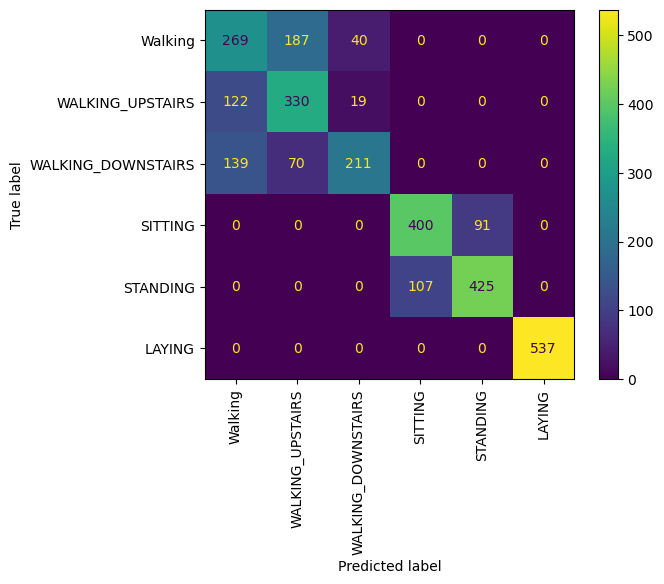

In [29]:
ConfusionMatrixDisplay.from_estimator(
    melhor_arvore,
    X_test_selected,
    y_test,
    display_labels=['Walking', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                    'SITTING', 'STANDING', 'LAYING'],
    xticks_rotation=90
)
plt.show()

In [30]:
# Modelo com 3 variáveis

y_pred_3 = melhor_arvore.predict(X_test_selected)
cm = confusion_matrix(y_test, y_pred_3)
acertos = cm.diagonal()
erros = cm.sum(axis=0) - acertos
total = acertos + erros

avaliacao1 = pd.DataFrame({
    'Classe': ['Walking', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                    'SITTING', 'STANDING', 'LAYING'],
    'Acertos': acertos, 
    'Erros': erros, 
    'Total' : total, 
    '%' : (acertos / (total)) * 100
})

avaliacao1['%'] = avaliacao1['%'].round(2)
avaliacao1.set_index('Classe', inplace=True)
avaliacao1

,Acertos,Erros,Total,%
Classe,,,,
Walking,269,261,530,50.75
WALKING_UPSTAIRS,330,257,587,56.22
WALKING_DOWNSTAIRS,211,59,270,78.15
SITTING,400,107,507,78.90
STANDING,425,91,516,82.36
LAYING,537,0,537,100.00


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

#### Definindo novas variáveis a partir de sua relevância (optei por fazer algo diferente do proposto, uma vez que a ideia é melhorar o modelo)

Para tal, vamos considerar a avaliação das variáveis partindo de um modelo com profundidade 5.

In [33]:
clf2 = DecisionTreeClassifier(max_depth=5, random_state=2360873)
clf2

DecisionTreeClassifier(max_depth=5, random_state=2360873)

In [34]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2360873)

In [35]:
var_relevantes = clf2.feature_importances_
var_interesse = var_relevantes[var_relevantes > 0]
var_interesse = sorted(var_interesse, reverse=True)
print(var_interesse)
print('------------------------------------------------------')

# Encontrando as colunas
col_index = []
colunas = []
for _ in var_interesse:
    col = list(var_relevantes).index(_)
    col_interesse = X_train.columns[col]
    col_index.append(col)
    colunas.append(col_interesse)

print('--> Índice das colunas: {}'.format(col_index))
print('------------------------------------------------------')
print('--> As três variáveis mais relevantes são: {}'.format(colunas))

[0.28146181114336577, 0.23908506148687597, 0.1563289946802878, 0.12987448060335002, 0.11420724949524688, 0.026959189140856467, 0.0168487283211372, 0.010618921098133558, 0.00961546299470159, 0.00491800522534433, 0.003358953601961852, 0.0027510406577634116, 0.002335924100983588, 0.001636177449991427]
------------------------------------------------------
--> Índice das colunas: [52, 265, 559, 508, 74, 448, 159, 57, 129, 132, 54, 67, 53, 393]
------------------------------------------------------
--> As três variáveis mais relevantes são: ['tGravityAcc-min()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)', 'fBodyAccMag-energy()', 'tGravityAcc-arCoeff()-Z,2', 'fBodyGyro-maxInds-X', 'tBodyGyro-correlation()-Y,Z', 'tGravityAcc-energy()-Y', 'tBodyGyro-max()-X', 'tBodyGyro-min()-X', 'tGravityAcc-min()-Z', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-min()-Y', 'fBodyAccJerk-bandsEnergy()-1,24']


In [36]:
# Ajustando banco de dados com as variáveis selecionadas 
x_train_vars = X_train[colunas]
print(x_train_vars.shape)
x_train_vars.head()

(7352, 14)


,,tGravityAcc-min()-X,fBodyAcc-mean()-X,"angle(Y,gravityMean)",fBodyAccMag-energy(),"tGravityAcc-arCoeff()-Z,2",fBodyGyro-maxInds-X,"tBodyGyro-correlation()-Y,Z",tGravityAcc-energy()-Y,tBodyGyro-max()-X,tBodyGyro-min()-X,tGravityAcc-min()-Z,"tGravityAcc-arCoeff()-X,3",tGravityAcc-min()-Y,"fBodyAccJerk-bandsEnergy()-1,24"
,subject_id,,,,,,,,,,,,,,
0,1,0.977436,-0.994783,0.179941,-0.998285,0.995675,-1.0,0.301099,-0.970905,-0.867044,0.847308,0.056483,-0.591773,-0.123213,-0.999981
1,1,0.984520,-0.997451,0.180289,-0.999472,0.834271,-1.0,0.169395,-0.970583,-0.864904,0.833721,0.102764,-0.417567,-0.114893,-0.999974
2,1,0.986770,-0.993594,0.180637,-0.999807,0.714392,-1.0,-0.350646,-0.970368,-0.864904,0.833721,0.102764,-0.056728,-0.114893,-0.999909
3,1,0.986821,-0.995491,0.181935,-0.999770,0.386373,-1.0,-0.725301,-0.969400,-0.885320,0.834164,0.095753,-0.085823,-0.121336,-0.999927
4,1,0.987434,-0.997286,0.185151,-0.999873,0.239268,-1.0,-0.724558,-0.967051,-0.870154,0.839091,0.094059,-0.280665,-0.121834,-0.999975


In [37]:
# para os dados de teste
x_test_vars = X_test[colunas]
print(x_test_vars.shape)
x_test_vars.head(3)

(2947, 14)


,,tGravityAcc-min()-X,fBodyAcc-mean()-X,"angle(Y,gravityMean)",fBodyAccMag-energy(),"tGravityAcc-arCoeff()-Z,2",fBodyGyro-maxInds-X,"tBodyGyro-correlation()-Y,Z",tGravityAcc-energy()-Y,tBodyGyro-max()-X,tBodyGyro-min()-X,tGravityAcc-min()-Z,"tGravityAcc-arCoeff()-X,3",tGravityAcc-min()-Y,"fBodyAccJerk-bandsEnergy()-1,24"
,subject_id,,,,,,,,,,,,,,
0,2,0.944461,-0.918510,0.276801,-0.953984,0.987180,-1.0,-0.301735,-0.864621,-0.663411,0.837100,-0.076162,-0.431839,-0.262160,-0.996894
1,2,0.944461,-0.960903,0.281343,-0.998476,0.869290,-1.0,-0.533962,-0.858163,-0.810337,0.823033,0.149013,-0.540245,-0.262160,-0.999197
2,2,0.948704,-0.991906,0.280083,-0.999570,0.440302,-1.0,-0.730050,-0.859947,-0.873794,0.823033,0.144969,-0.315239,-0.261661,-0.999932


##### Utilizando k-fold (cross-validation) considerando as novas variáveis


In [98]:
# ccp_alphas

clf_ = DecisionTreeClassifier(random_state=2360873)
path = clf_.cost_complexity_pruning_path(x_train_vars, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [40]:
len(ccp_alphas)

149

In [41]:
%%time
# Definindo k-fold

# Estimator
estimator = clf_

# Parâmetros do grid
param_grid = {'ccp_alpha': ccp_alphas}

grid = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    cv = 10,
    # verbose = 100
)
grid.fit(x_train_vars, y_train)

CPU times: total: 2min 17s
Wall time: 2min 18s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.27516322e-04, 1.29834801e-04, 1.29834801e-04,
       1.31629752e-04, 1.32239149e-04, 1.32438005e-04, 1.32438005e-04,
       1.33060510e-04, 1.33712030e-04, 1.33787617e-04, 1.34250950e-04,
       1.35424311e-04, 1.35617946e-04, 1.35690445e-04, 1.35732855e-04,
       1.360...
       1.69906809e-03, 1.70186682e-03, 1.81356547e-03, 1.91689388e-03,
       1.93638878e-03, 2.03389428e-03, 2.17853612e-03, 2.42338306e-03,
       3.44050914e-03, 3.82465333e-03, 4.64657671e-03, 4.71976373e-03,
       4.80983511e-03, 5.26736348e-03, 5.50087182e-03, 5.63088967e-03,
       7.42872230e-03, 1.07651549e-02, 1.17869342e-02, 1.88599508e-02,
       7.98964351e-02, 9.08568244e-02, 1.09363718e-01, 1.67257720e-01,
       1.86138242e-01])})

In [42]:
# Extraindo os resultados
resultados2 = pd.DataFrame(grid.cv_results_)
print(resultados2.shape)
resultados2.head(3)

(149, 19)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089191,0.002651,0.002995,0.000026,0.000000,{'ccp_alpha': 0.0},0.873641,0.828804,0.878912,0.816327,0.868027,0.895238,0.907483,0.881633,0.917007,0.858503,0.872557,0.030213,124
1,0.089858,0.002831,0.003468,0.001114,0.000128,{'ccp_alpha': 0.00012751632208922743},0.873641,0.828804,0.878912,0.816327,0.868027,0.895238,0.907483,0.881633,0.917007,0.858503,0.872557,0.030213,124
2,0.089255,0.003073,0.003107,0.000300,0.000130,{'ccp_alpha': 0.00012983480067266798},0.873641,0.828804,0.878912,0.816327,0.868027,0.895238,0.907483,0.881633,0.917007,0.858503,0.872557,0.030213,124


In [43]:
# Melhor parâmetro
grid.best_params_

{'ccp_alpha': 0.004719763725716487}

In [44]:
# Melhor acurácia no modelo
grid.best_score_ * 100

89.2957704821059

In [45]:
# Melhor árvore
melhor_arvore_vars = grid.best_estimator_
melhor_arvore_vars

DecisionTreeClassifier(ccp_alpha=0.004719763725716487, random_state=2360873)

##### Definindo acurácia na base de testes

In [47]:
acuracia = melhor_arvore_vars.score(x_test_vars, y_test)

print('A acurácia do modelo considerando novas variáveis é: {:.2f}%.'.format(acuracia*100))

A acurácia do modelo considerando novas variáveis é: 83.41%.


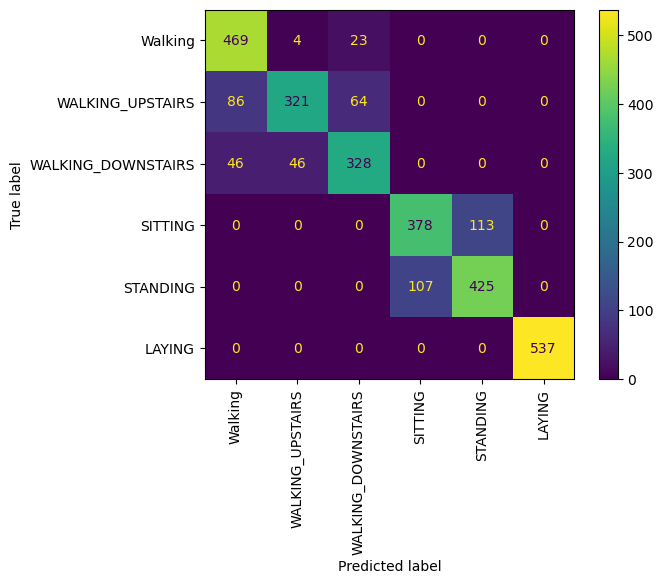

In [96]:
# Matriz de confusão

ConfusionMatrixDisplay.from_estimator(
    melhor_arvore_vars,
    x_test_vars,
    y_test,
    display_labels=['Walking', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                    'SITTING', 'STANDING', 'LAYING'],
    xticks_rotation=90
)
plt.show()

In [49]:
# Modelo final com multiplas variáveis (questão 5)

y_pred = melhor_arvore_vars.predict(x_test_vars)
cm = confusion_matrix(y_test, y_pred)
acertos = cm.diagonal()
erros = cm.sum(axis=0) - acertos
total = acertos + erros

avaliacao2 = pd.DataFrame({
    'Classe': ['Walking', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS',
                    'SITTING', 'STANDING', 'LAYING'],
    'Acertos': acertos, 
    'Erros': erros, 
    'Total' : total, 
    '%' : (acertos / (total)) * 100
})

avaliacao2['%'] = avaliacao2['%'].round(2)
avaliacao2.set_index('Classe', inplace=True)
avaliacao2

,Acertos,Erros,Total,%
Classe,,,,
Walking,469,132,601,78.04
WALKING_UPSTAIRS,321,50,371,86.52
WALKING_DOWNSTAIRS,328,87,415,79.04
SITTING,378,107,485,77.94
STANDING,425,113,538,79.00
LAYING,537,0,537,100.00


In [50]:
# Questão 4
avaliacao1

,Acertos,Erros,Total,%
Classe,,,,
Walking,269,261,530,50.75
WALKING_UPSTAIRS,330,257,587,56.22
WALKING_DOWNSTAIRS,211,59,270,78.15
SITTING,400,107,507,78.90
STANDING,425,91,516,82.36
LAYING,537,0,537,100.00


##### Insights

- A consideração de novas variáveis levando em conta sua relevância para um modelo inicial de profundidade 5 rendeu uma significativa melhoria para o modelo final (questão 5) se comparado com o da questão 4. Uma melhoria que saiu de $73.70$% na questão 4 para $83.41$% na questão 5.
- Na questão 5 é possível notar uma sutil piora na identificação das classes `SITTING` e `STANDING`, como pode ser visto a partir das porcentagens nos dataframes *avaliacao1* (questão 4) e *avaliacao2* (questão 5). No que tange às demais classes o modelo obteve uma melhora significativa.